In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\AI&ML\car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.shape

(1727, 7)

<AxesSubplot:>

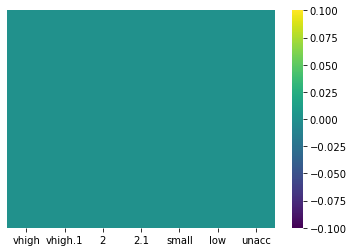

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis' )

In [8]:
col_name=('buying',',maint','doors','persons','lug_boot','safety','class')
df.columns=col_name
df.head()

,buying,",maint",doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df['buying'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64

In [10]:
for i in df.columns:
    print(i, ':/n',df[i].value_counts())

buying :/n high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
,maint :/n high     432
med      432
low      432
vhigh    431
Name: ,maint, dtype: int64
doors :/n 3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
persons :/n 4       576
more    576
2       575
Name: persons, dtype: int64
lug_boot :/n med      576
big      576
small    575
Name: lug_boot, dtype: int64
safety :/n med     576
high    576
low     575
Name: safety, dtype: int64
class :/n unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


# Feature Engineering

In [18]:
import category_encoders as cate

In [19]:
!pip install category_encoders

In [22]:
encoders=cate.OrdinalEncoder(cols=['buying',',maint','doors','persons','lug_boot','safety','class'])
df=encoders.fit_transform(df)


In [25]:
for i in df.columns:
        print(i, ':/n',df[i].value_counts())

buying :/n 2    432
3    432
4    432
1    431
Name: buying, dtype: int64
,maint :/n 2    432
3    432
4    432
1    431
Name: ,maint, dtype: int64
doors :/n 2    432
3    432
4    432
1    431
Name: doors, dtype: int64
persons :/n 2    576
3    576
1    575
Name: persons, dtype: int64
lug_boot :/n 2    576
3    576
1    575
Name: lug_boot, dtype: int64
safety :/n 1    576
2    576
3    575
Name: safety, dtype: int64
class :/n 1    1209
2     384
4      69
3      65
Name: class, dtype: int64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1727 non-null   int32
 1   ,maint    1727 non-null   int32
 2   doors     1727 non-null   int32
 3   persons   1727 non-null   int32
 4   lug_boot  1727 non-null   int32
 5   safety    1727 non-null   int32
 6   class     1727 non-null   int32
dtypes: int32(7)
memory usage: 47.3 KB


In [27]:
encode=cate.OrdinalEncoder(cols=['class'])
df=encode.fit_transform(df)

# Spliting the Dataset

In [28]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Importing Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf=RandomForestClassifier(n_estimators=100, random_state=0)

In [34]:
rf.fit(X_train, Y_train)
y_pred=rf.predict(X_test)

C:\Users\Harshit\AppData\Local\Temp/ipykernel_9540/1199942508.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(Y_test, y_pred)

0.9682080924855492

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
cm=confusion_matrix(Y_test, y_pred, labels=[1,2,3,4])
cm

array([[237,   0,   0,   0],
       [  0,  75,   1,   1],
       [  0,   4,  12,   1],
       [  0,   1,   3,  11]], dtype=int64)

In [41]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       237
           2       0.94      0.97      0.96        77
           3       0.75      0.71      0.73        17
           4       0.85      0.73      0.79        15

    accuracy                           0.97       346
   macro avg       0.88      0.85      0.87       346
weighted avg       0.97      0.97      0.97       346

